# Gathering Data

In [117]:
# Import Modules
import numpy as np
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Twitter Archive

In [2]:
# Read Enhanced Archive
enhanced_twitter = pd.read_csv('twitter-archive-enhanced.csv')

## Image Predictions

In [3]:
# Define website and get URL data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response =requests.get(url)

# Read and Write URL in Response file
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

# Read created file    
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

## Twitter JSON

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = enhanced_twitter.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 7598

Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166:

Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440:

Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714:

Fail
2227: 668274247790391296
Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260:

In [5]:
# Save file as variable
text_file = 'tweet-json.txt'
# Read file as Pandas Dataframe
tweet_json_df = pd.read_json(text_file, lines = True)
# extract columns that pertain to like and favorite counts
columns_of_interest = ['id', 'retweet_count', 'favorite_count']
# Load Columns into dataframe
tweet_json = tweet_json_df[columns_of_interest]

In [6]:
# Sample Dataframs
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing Data

In [7]:
# Size and Shape of Enhanced Twitter
enhanced_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
# Size and Shape of Tweet Json
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [9]:
# Image Predictions shape and size
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
# Enhanced Twitter sample
enhanced_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# Sample image Predictions
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
enhanced_twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
enhanced_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [15]:
#See what else was submitted
image_predictions[image_predictions.p1_dog == False].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False


## Assessment

### Quality

> Remove the Retweeted/Unoriginal Images that are present

> Correct Sources that are unclear

> Consolidate the Names that did not pull correctly

> Breed Names unintuitive, remove underscores

> Lowercase all breed names

> Tweet_ID fields should not be int or float, but should be strings

> Recapture the Numerators

> Column name Id not Tweet_ID

> There are some names that were not extracted properly

> Remove columns that are no longer needed, or repeat information

### Tidy
> Merge the tables into one table

> Combine Dog Type columns into one for clarity purposes

# Cleaning Data

In [122]:
# Make clean copies of the Data
twitter_clean = enhanced_twitter.copy()
image_clean = image_predictions.copy()
tweet_clean = tweet_json.copy()

### Show only original tweets

#### Define

Remove retweeted columns

#### Code

In [123]:
# Copy dataframe where only non retweets are shown
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]

#### Test

In [124]:
twitter_clean.retweeted_status_id.isnull().sum()

2175

### Correct ID column name

#### Define

Correct Column name

#### Code

In [125]:
# Correct Column ID
tweet_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [126]:
# confirm Correction
tweet_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [127]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Correct ID datatype

#### Define

Id should be string since not required for calculations.

#### Code

In [128]:
# Convert Data types
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype(str)

#### Test

In [129]:
twitter_clean.info(), image_clean.info(), tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(2), object(

(None, None, None)

### Consolidate Dog type

#### Define

Create new row with dog type.

#### Code

In [130]:
# Create new column that merges the dog type descriptors
twitter_clean['doge_type'] = twitter_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)

#### Test

In [131]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
doge_type                     364 non

In [165]:
twitter_clean['doge_type'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: doge_type, dtype: int64

In [132]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,doge_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


### Correct numerator and denominator

#### Define

Rating previously included decimals, correct to original

#### Code

In [133]:
# Replace Data with float
twitter_clean.rating_numerator = twitter_clean.text.str.extract(r'((?:\d+\.)?\d+)\/\d+', expand = True).astype('float')

#### Test

In [134]:
twitter_clean[twitter_clean.rating_numerator == 13.5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,doge_type
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,None,None,None,None,NaN


In [135]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
doge_type                     364 n

In [136]:
twitter_clean.rating_numerator.value_counts()

12.00      500
10.00      442
11.00      426
13.00      307
9.00       156
8.00        98
7.00        54
14.00       43
5.00        34
6.00        32
3.00        19
4.00        17
2.00         9
1.00         8
420.00       2
0.00         2
17.00        1
24.00        1
84.00        1
13.50        1
15.00        1
960.00       1
143.00       1
50.00        1
99.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
9.75         1
666.00       1
11.27        1
121.00       1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
80.00        1
Name: rating_numerator, dtype: int64

### Drop Retweeted information

#### Define

Now that the retweets have been removed the data is irrelevant and may be dropped for clarity purposes

#### Code

In [137]:
# Drop Retweeted information and Dog Slang
twitter_clean = twitter_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
                                    'doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [138]:
#Confirmed columns dropped
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doge_type                364 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 203.9+ KB


### Correct Source

#### Define

Sources are cluttered and hard to read

#### Code

In [139]:
# Correct/unclutter sources
twitter_clean['source'] = twitter_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_clean['source'] = twitter_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_clean['source'] = twitter_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_clean['source'] = twitter_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [140]:
#Confirm source correction
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doge_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN


### Limit the breed rows/correct title

#### Define

Breeds can't be confirmed. Using Highest probability and Removing remaining columns

#### Code

In [141]:
# Focus on Breed
image_clean = image_clean.drop(['p1_conf','p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

In [142]:
# Rename column
image_clean.rename(columns={'p1':'breed'}, inplace = True)

#### Test

In [143]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
breed       2075 non-null object
dtypes: int64(1), object(3)
memory usage: 64.9+ KB


### Replace Underscores

#### Define

Replace the underscores with spaces and lowercase all entries for readability/continuity.

#### Code

In [144]:
#Replace Underscores
image_clean['breed'] = image_clean['breed'].str.replace('_', ' ')

In [145]:
# Lowercase for continuity
image_clean['breed'] = image_clean['breed'].str.lower()

#### Test

In [146]:
#Check for changes
image_clean.head()

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher


### Correct Names

#### Define

Replace unclear names 

#### Code

In [147]:
# Replace misconverted names  as NaN
twitter_clean.name.replace(['a', 'such', 'quite', 'not', 'one', 'mad','an', 'incredibly', 'very', 'my', 'not','his',
                               'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating','the','by', 
                               'officially', 'life', 'light','space'], np.NaN, inplace = True) 

In [148]:
# Replace O'Malley
twitter_clean.name.replace('O', 'O\'malley', inplace = True)

#### Test

In [149]:
#Confirm replacement with sample as there are plenty of names/variations and value counts would be large
twitter_clean[twitter_clean.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doge_type


In [150]:
twitter_clean[twitter_clean.name == 'O\'malley']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doge_type
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10.0,10,O'malley,NaN


### Merge DFs into One DF

In [151]:
twitter_master = pd.merge(twitter_clean, image_clean, on='tweet_id', how = 'left')

In [152]:
twitter_master = pd.merge(twitter_master, tweet_clean, on='tweet_id',how='left')

In [153]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 16 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     2074 non-null object
doge_type                364 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
breed                    1994 non-null object
retweet_count            2175 non-null int64
favorite_count           2175 non-null int64
dtypes: float64(4), int64(3), object(9)
memory usage: 288.9+ KB


In [154]:
twitter_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doge_type,jpg_url,img_num,breed,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper towel,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,9774,41048


## Storing files

In [155]:
twitter_clean.to_csv('enhanced_twitter_clean.csv')
image_clean.to_csv('image_predicitions_clean.csv')
tweet_clean.to_csv('tweet_json_clean.csv')
twitter_master.to_csv('twitter_master.csv')

## Analysis

In [156]:
# Summary Statistics on the integers

twitter_master.describe()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,7.800000e+01,7.800000e+01,2175.000000,2175.000000,1994.000000,2175.000000,2175.000000
mean,7.455079e+17,2.014171e+16,13.177140,10.492874,1.203109,2757.987126,8746.022989
std,7.582492e+16,1.252797e+17,47.705088,7.019084,0.560777,4646.599662,12052.503836
min,6.658147e+17,1.185634e+07,0.000000,0.000000,1.000000,0.000000,52.000000
25%,6.757419e+17,3.086374e+08,10.000000,10.000000,1.000000,608.000000,1911.500000
50%,7.038708e+17,4.196984e+09,11.000000,10.000000,1.000000,1341.000000,4042.000000
75%,8.257804e+17,4.196984e+09,12.000000,10.000000,1.000000,3220.000000,11107.000000
max,8.862664e+17,8.405479e+17,1776.000000,170.000000,4.000000,79515.000000,132810.000000


> The average numerator was higher than the average denominator

> People were more likely to favorite than retweet.

In [157]:
# Most Shared Breed was
twitter_master.groupby('breed')['retweet_count'].sum().sort_values(ascending=False)

breed
golden retriever             502096
labrador retriever           366682
pembroke                     280367
chihuahua                    220695
samoyed                      184922
french bulldog               121782
chow                         116361
pomeranian                   106518
cocker spaniel               100561
pug                           99182
toy poodle                    93448
eskimo dog                    85840
web site                      81460
cardigan                      77190
malamute                      73819
lakeland terrier              71718
great pyrenees                66252
chesapeake bay retriever      62793
seat belt                     58113
english springer              53762
miniature pinscher            53716
german shepherd               53174
swing                         51088
staffordshire bullterrier     46883
standard poodle               46423
shetland sheepdog             43455
basset                        42441
rottweiler            

The most retweeted dogs were Golden Retreviers, Lab, Pembroke, Chihuahua, Samoyed

In [158]:
# Most Liked Breed was
twitter_master.groupby('breed')['favorite_count'].sum().sort_values(ascending=False)

breed
golden retriever             1696627
labrador retriever           1123850
pembroke                      994755
chihuahua                     676441
samoyed                       542991
french bulldog                465738
chow                          404241
pug                           320223
cocker spaniel                315825
pomeranian                    299114
cardigan                      260287
toy poodle                    252446
web site                      250449
malamute                      249179
chesapeake bay retriever      232997
eskimo dog                    216028
lakeland terrier              207292
german shepherd               203093
miniature pinscher            192051
staffordshire bullterrier     187099
great pyrenees                181048
basset                        180258
seat belt                     167339
shetland sheepdog             154553
english springer              140915
swing                         140611
siberian husky                13

This appears to be trend. The retweets and like might be correlated

In [159]:
twitter_master.groupby('breed')['rating_numerator'].sum().sort_values(ascending=False)

breed
golden retriever               1844.50
bow tie                        1806.00
labrador retriever             1321.00
pembroke                       1007.00
chihuahua                       846.00
pug                             553.00
chow                            476.00
samoyed                         468.00
pomeranian                      423.75
toy poodle                      422.00
microphone                      420.00
teddy                           326.00
malamute                        316.00
cocker spaniel                  305.00
french bulldog                  293.00
soft-coated wheaten terrier     280.00
siberian husky                  265.00
chesapeake bay retriever        248.00
miniature pinscher              233.00
german shepherd                 220.00
west highland white terrier     219.00
lakeside                        216.00
eskimo dog                      212.00
great pyrenees                  209.00
staffordshire bullterrier       203.00
cardigan           

In [160]:
twitter_master[twitter_master.breed == 'bow tie']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doge_type,jpg_url,img_num,breed,retweet_count,favorite_count
804,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,bow tie,2772,5569
891,740365076218183684,NaN,NaN,2016-06-08 02:09:24 +0000,Twitter for iPhone,When the photographer forgets to tell you wher...,https://twitter.com/dog_rates/status/740365076...,10.0,10,None,NaN,https://pbs.twimg.com/media/CkZOGhJWsAAHvPv.jpg,1.0,bow tie,495,2727
1283,694905863685980160,NaN,NaN,2016-02-03 15:30:43 +0000,Twitter for iPhone,This is Archie. He's a Bisquick Taj Mapaw. Too...,https://twitter.com/dog_rates/status/694905863...,10.0,10,Archie,NaN,https://pbs.twimg.com/media/CaTNMUgUYAAB6vs.jpg,1.0,bow tie,1053,3046
1939,670420569653809152,NaN,NaN,2015-11-28 01:54:54 +0000,Twitter for iPhone,This is Damon. The newest presidential candida...,https://twitter.com/dog_rates/status/670420569...,10.0,10,Damon,NaN,https://pbs.twimg.com/media/CU3P82RWEAAIVrE.jpg,1.0,bow tie,342,668


In [161]:
twitter_master[twitter_master.breed != 'bow tie'].groupby('breed')['rating_numerator'].sum().sort_values(ascending=False)

breed
golden retriever               1844.50
labrador retriever             1321.00
pembroke                       1007.00
chihuahua                       846.00
pug                             553.00
chow                            476.00
samoyed                         468.00
pomeranian                      423.75
toy poodle                      422.00
microphone                      420.00
teddy                           326.00
malamute                        316.00
cocker spaniel                  305.00
french bulldog                  293.00
soft-coated wheaten terrier     280.00
siberian husky                  265.00
chesapeake bay retriever        248.00
miniature pinscher              233.00
german shepherd                 220.00
west highland white terrier     219.00
lakeside                        216.00
eskimo dog                      212.00
great pyrenees                  209.00
staffordshire bullterrier       203.00
cardigan                        196.00
rottweiler         

There seems to be variation within the rating totals

Text(0, 0.5, 'Favorites')

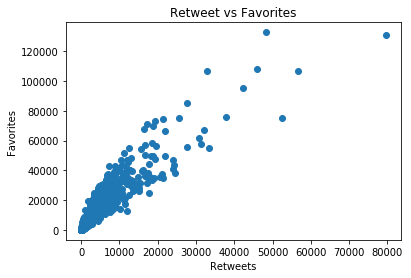

In [162]:
plt.scatter(x = twitter_master.retweet_count, y = twitter_master.favorite_count)
plt.title('Retweet vs Favorites')
plt.xlabel('Retweets')
plt.ylabel('Favorites')